# Experimentos con Dataset Disvoice Mujeres
## Adrián Arnaiz
> * Ruta: */ser/CaracteristicasExtraidas/DivisionSexo/mujeres*
* Módulo de carga de datos: */src/cargaDatosMujeres.py*
     * Cada uno Contiene load_....py siendo ... todos los conjuntos de datos extraidos para Disvoice de mujeres. [30: 18 normales + 12 excatos Orozco 2016 ]
     
* **Cuando dividimos por sexo el que mejor funciona es art_campana, seguido de petaka.** Esto se ajusta más a los resultados de los papers donde se dice que **las palabras son las que mejor funcionan.** Aun así, ni nos acercamos a los resultados que obtienen en esos papers.

* Del mismo modo se obtienen los mejores resultados con las **as tipo art_-... que son los equivalentes a unvoiced (Transiciones)**

* Por lo general **suben las medidas todas, hasta llegar algunos clasificadores al 0.8,** cosa que en los anteriores experimenteos llegaban uno o dos como mucho. **Se mejoran los resultados en pocos puntos para los clasificadores, obteniendo mejores resultados que para los otros experimentos.**

##### SE CONSIGUE EL MEJOR RESULTADO OBTENIDO HASTA AHORA CON UN 0.905 PARA VT(0.5, NORM(ART_RT))-ADABOOST y también para Seleckt KBest + AdaBoost art_w_campana-:0.908
> Para el conjunto de datos articularion_rt, trans normalizarle y hacer selección de atributos con Variance Treshold y con el clasificador AdaBoost por Defecto

<a id="index"></a>
## Índice del notebook
1. [Experimentos mujeres](#rep)
 1. [Experimentos estandar - Experimenter](#exp)
    1. [Accuracy - atribs. por defecto](#acudef)
    2. [Accuracy - atribs. normalizados](#acunorm)
    3. [AUC - atribs. por defecto](#aucdef)
    4. [Accuracy - atribs. normalizados](#aucnorm)
 5. [Grid-Search \ SVM $\rightarrow$ Orozco](#gssvm)
 6. [Variance Treshold](#vtres)
 7. [SKBest](#skbest)
 8. [! Grid Search \ VarianceTeshold + AdaBoost](#vtab)
 9. [Grid Search \ Seleckt KBest + RF](#skrf)
 9. [! Grid Search \ Seleckt KBest + AdaBoost](#skada)
 9. [Grid Search \ Seleckt KBest + GBC](#skgbc)

 ----------------------

In [1]:
import cargaDatosMujeres
from extractorCcas import ExtractorCaracteristicas
from experimenter import *
from IPython.display import clear_output
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# 1. Experimentos conjunto de datos mujeres <a id="rep"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Repetiremos el conjuto de experimentos que hemos ido realizando para todos los anteriores conjuntos de datos y así poder comparar resultados.

**Experimenter.GridSearchPipe(moduloDeDatos, pipe, paramgrid, verbose=True, normalizar=True): utiliza ROC_AUC**
## 1.1 Experimentos estandar - Experimenter <a id="exp"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [2]:
tipoDatos = "cargaDatosMujeres"
general = {
    "ID":"ExperimentoBase",
    "N_FOLDS":10
}

datasets = [
    {
        "ID_DATA":"art_rt",
        "ORIGIN": tipoDatos+".load_art_rt",
    },
    {
        "ID_DATA":"art_rt_ON",
        "ORIGIN": tipoDatos+".load_art_rt_onset",
    },
    {
        "ID_DATA":"art_rt_OFF",
        "ORIGIN": tipoDatos+".load_art_rt_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_atleta",
        "ORIGIN":tipoDatos+".load_art_w_atleta",
    },
    {
        "ID_DATA":"art_w_atleta_ON",
        "ORIGIN":tipoDatos+".load_art_w_atleta_onset",
    },
    {
        "ID_DATA":"art_w_atleta_OFF",
        "ORIGIN":tipoDatos+".load_art_w_atleta_ofset",
    },
    
    
    
    {
        "ID_DATA":"art_w_braso",
        "ORIGIN":tipoDatos+".load_art_w_braso",
    },
    {
        "ID_DATA":"art_w_braso_ON",
        "ORIGIN":tipoDatos+".load_art_w_braso_onset",
    },
    {
        "ID_DATA":"art_w_braso_OFF",
        "ORIGIN":tipoDatos+".load_art_w_braso_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_campana",
        "ORIGIN":tipoDatos+".load_art_w_campana",
    },
    {
        "ID_DATA":"art_w_campana_ON",
        "ORIGIN":tipoDatos+".load_art_w_campana_onset",
    },
    {
        "ID_DATA":"art_w_campana_OFF",
        "ORIGIN":tipoDatos+".load_art_w_campana_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_gato",
        "ORIGIN":tipoDatos+".load_art_w_gato",
    },
    {
        "ID_DATA":"art_w_gato_ON",
        "ORIGIN":tipoDatos+".load_art_w_gato_onset",
    },
    {
        "ID_DATA":"art_w_gato_OFF",
        "ORIGIN":tipoDatos+".load_art_w_gato_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_petaka",
        "ORIGIN":tipoDatos+".load_art_w_petaka",
    },
    {
        "ID_DATA":"art_w_petaka_ON",
        "ORIGIN":tipoDatos+".load_art_w_petaka_onset",
    },
    {
        "ID_DATA":"art_w_petaka_OFF",
        "ORIGIN":tipoDatos+".load_art_w_petaka_ofset",
    },
    
    
    {
        "ID_DATA":"fon_rt",
        "ORIGIN":tipoDatos+".load_fon_rt",
    },
    {
        "ID_DATA":"fon_v_A",
        "ORIGIN":tipoDatos+".load_fon_v_A",
    },
    {
        "ID_DATA":"fon_v_E",
        "ORIGIN":tipoDatos+".load_fon_v_E",
    },
    {
        "ID_DATA":"fon_v_I",
        "ORIGIN":tipoDatos+".load_fon_v_I",
    },
    {
        "ID_DATA":"fon_v_O",
        "ORIGIN":tipoDatos+".load_fon_v_O",
    },
    {
        "ID_DATA":"fon_v_U",
        "ORIGIN":tipoDatos+".load_fon_v_U",
    },
    {
        "ID_DATA":"fon_w_atleta",
        "ORIGIN":tipoDatos+".load_fon_w_atleta",
    },
    {
        "ID_DATA":"fon_w_braso",
        "ORIGIN":tipoDatos+".load_fon_w_braso",
    },
    {
        "ID_DATA":"fon_w_campana",
        "ORIGIN":tipoDatos+".load_fon_w_campana",
    },
    {
        "ID_DATA":"fon_w_gato",
        "ORIGIN":tipoDatos+".load_fon_w_gato",
    },
    {
        "ID_DATA":"fon_w_petaka",
        "ORIGIN":tipoDatos+".load_fon_w_petaka",
    },
    {
        "ID_DATA":"prs_rt",
        "ORIGIN":tipoDatos+".load_prs_rt",
    }

]

algoritmos = [
    {
        "ID_ALG":"KNN8",
        "ALGO": "sklearn.neighbors.KNeighborsClassifier",
        "PARAMS":{
            "n_neighbors":8,
            "metric":"euclidean"
        }
    },
    {
        "ID_ALG":"Tree",
        "ALGO": "sklearn.tree.DecisionTreeClassifier",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"Bayes",
        "ALGO": "sklearn.naive_bayes.GaussianNB",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"SVM",
        "ALGO": "sklearn.svm.SVC",
        "PARAMS":{
        }
    },
    {
        "ID_ALG":"RandomF",
        "ALGO": "sklearn.ensemble.RandomForestClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Ada",
        "ALGO": "sklearn.ensemble.AdaBoostClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Reglas",
        "ALGO": "sklearn.dummy.DummyClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"GBC",
        "ALGO": "sklearn.ensemble.GradientBoostingClassifier",
        "PARAMS":{ 
        }
    },
    
]

output = {
    "METRIC":"accuracy",
    "DISPLAY":"table"
}

experimento = {
    "GENERAL":general,
    "DATASETS":datasets,
    "ALGORITMOS":algoritmos,
    "OUTPUT": output    
}

### 1.1.1 Acuracy -  atribs sin modificar <a id="acudef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor: art_w_campana: GBC y ADA: 0.79

AdaBOOST, que era antes el mejor, se comporta peor que antes en la mayoría de los datasets (excepciones como art_petaka). Sin embargo está dentro de los  que mejor funcionan: GBC, ADA. **(0.79 ADA y GBC-art_campana)**. 0 por encima del 0.8.

No hay mejora significativa ni debido a la división del conjunto por sexos, ni debido a la extracción exacta de ccas como las de Orozco (_ON y _OF)

In [3]:
warnings.filterwarnings('ignore')
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [4]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.583333,0.650000,0.550000,0.541667,0.383333,0.650000,0.483333,0.725000
art_rt_ON,0.683333,0.516667,0.591667,0.533333,0.458333,0.508333,0.491667,0.525000
art_rt_OFF,0.650000,0.491667,0.641667,0.608333,0.575000,0.633333,0.475000,0.416667
art_w_atleta,0.541667,0.550000,0.558333,0.550000,0.433333,0.450000,0.425000,0.525000
art_w_atleta_ON,0.600000,0.475000,0.533333,0.583333,0.333333,0.450000,0.425000,0.441667
art_w_atleta_OFF,0.608333,0.416667,0.591667,0.691667,0.483333,0.483333,0.508333,0.383333
art_w_braso,0.475000,0.450000,0.616667,0.475000,0.508333,0.608333,0.391667,0.433333
art_w_braso_ON,0.458333,0.516667,0.625000,0.591667,0.475000,0.541667,0.491667,0.508333
art_w_braso_OFF,0.433333,0.558333,0.550000,0.500000,0.475000,0.541667,0.575000,0.475000
art_w_campana,0.625000,0.750000,0.625000,0.500000,0.591667,0.791667,0.541667,0.791667


In [ ]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.2 Acuracy -  atribs normalizados <a id="acunorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor resultado: art_campana seguido por petaka. Los 3 mejores:  GBC, ADA, TREE. **(0.79 Ada-art_campana)**. 0 por encima del 0.8

In [6]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [7]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.525000,0.641667,0.550000,0.666667,0.666667,0.650000,0.508333,0.725000
art_rt_ON,0.491667,0.516667,0.591667,0.575000,0.550000,0.508333,0.275000,0.550000
art_rt_OFF,0.516667,0.533333,0.641667,0.491667,0.441667,0.608333,0.583333,0.458333
art_w_atleta,0.591667,0.508333,0.558333,0.508333,0.583333,0.450000,0.650000,0.566667
art_w_atleta_ON,0.475000,0.491667,0.533333,0.616667,0.616667,0.416667,0.416667,0.441667
art_w_atleta_OFF,0.525000,0.400000,0.591667,0.516667,0.491667,0.483333,0.475000,0.383333
art_w_braso,0.375000,0.575000,0.616667,0.500000,0.458333,0.608333,0.325000,0.533333
art_w_braso_ON,0.525000,0.583333,0.625000,0.550000,0.591667,0.541667,0.441667,0.466667
art_w_braso_OFF,0.566667,0.641667,0.550000,0.525000,0.591667,0.516667,0.466667,0.550000
art_w_campana,0.700000,0.775000,0.625000,0.591667,0.608333,0.791667,0.575000,0.791667


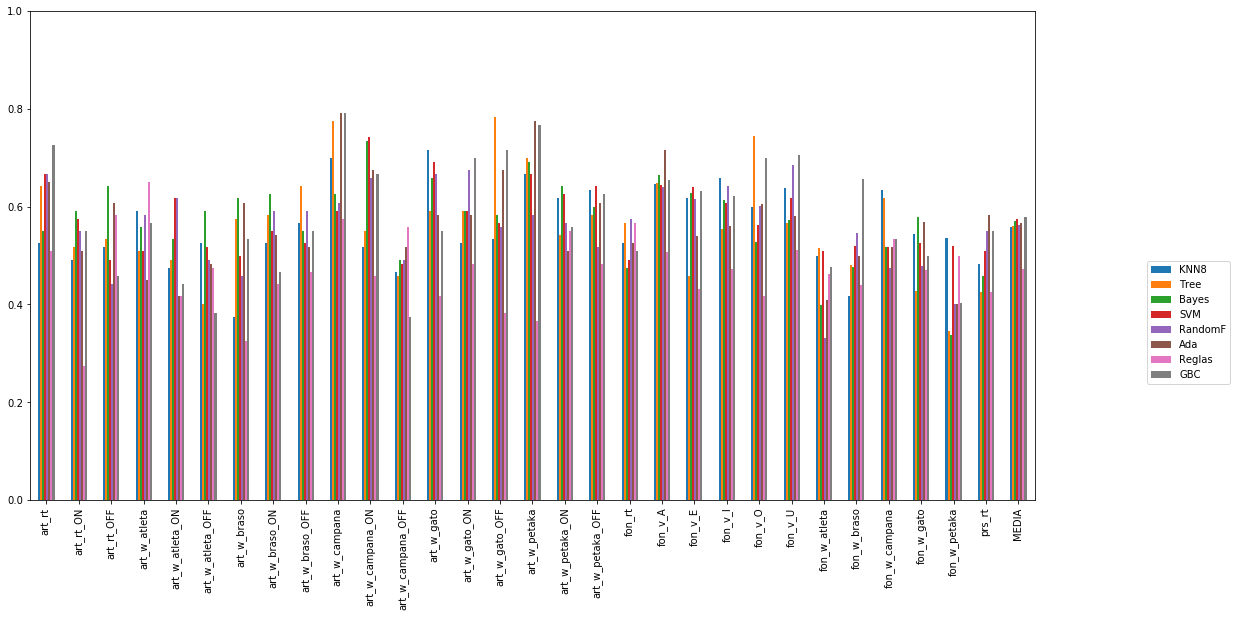

In [8]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.3 Auc - sin modificar <a id="aucdef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
El que mejor funciona es art_campana, seguido de petaka. Los 2 mejores son Ada y GBC **(0.88 Ada-art_campana)**. **Nos acercamos al mejor resultado obtenido por nosotros en un experimento**. 3 por encima del 0.8.

Por primera vez vemos como **unvoiced**(exactas Orzco2016), nos ayuda a mejoras sensiblemente un resultado. concretamenre art_atleta_OFF, que mejora el SVM hasta 0.79 (cerca de mejor resultado de SVM hasta el momento).

In [9]:
experimento['OUTPUT']['METRIC']='roc_auc'
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [10]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.609722,0.625000,0.619444,0.498611,0.612500,0.602778,0.391667,0.775000
art_rt_ON,0.613889,0.516667,0.636111,0.622222,0.487500,0.427778,0.400000,0.497222
art_rt_OFF,0.552778,0.591667,0.697222,0.627778,0.515278,0.644444,0.525000,0.430556
art_w_atleta,0.584722,0.475000,0.509722,0.651389,0.629167,0.447222,0.450000,0.519444
art_w_atleta_ON,0.658333,0.491667,0.538889,0.538889,0.413889,0.444444,0.450000,0.422222
art_w_atleta_OFF,0.662500,0.433333,0.625000,0.791667,0.562500,0.444444,0.616667,0.447222
art_w_braso,0.495833,0.533333,0.651389,0.437500,0.518056,0.538889,0.450000,0.444444
art_w_braso_ON,0.522222,0.475000,0.636111,0.530556,0.552778,0.472222,0.633333,0.413889
art_w_braso_OFF,0.419444,0.625000,0.552778,0.602778,0.591667,0.500000,0.475000,0.636111
art_w_campana,0.713889,0.750000,0.755556,0.608333,0.709722,0.883333,0.608333,0.850000


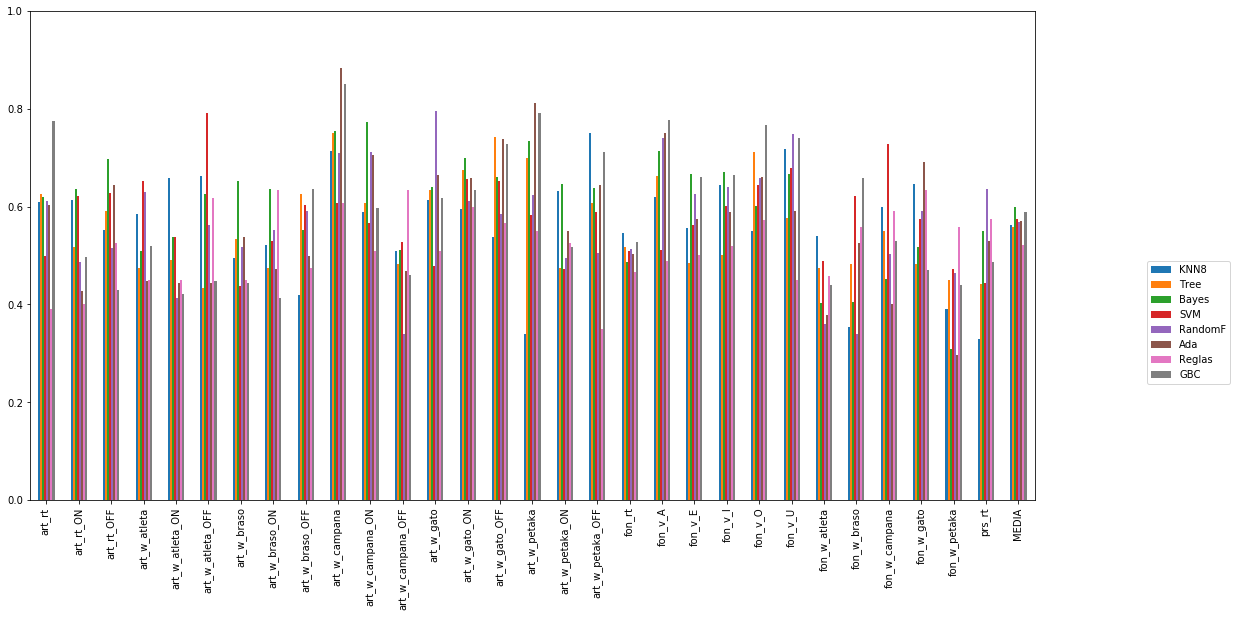

In [11]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.4  Auc - Normalizados <a id="aucnorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Resultados mejores con art_ccampana y art_petaka, siguiendo la tónica de los resultados anteriores.

En este caso vemos como ya 'muchos' (más que antes) clasificadores logran estar por encima del 0.8 AUC. 8 están por encima del 0.8. Mejor son Ada y Gbc, aunque se obtien resultados 'altos' con SVM-art_gato, RF-art_camp:0.8. Resultados mejores hasta el momento: **(0.89 GBC-art_campana)**

In [12]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [13]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.658333,0.616667,0.619444,0.702778,0.675000,0.602778,0.575000,0.775000
art_rt_ON,0.490278,0.516667,0.636111,0.683333,0.534722,0.427778,0.516667,0.486111
art_rt_OFF,0.577778,0.458333,0.697222,0.536111,0.647222,0.633333,0.516667,0.480556
art_w_atleta,0.626389,0.558333,0.498611,0.613889,0.498611,0.447222,0.425000,0.530556
art_w_atleta_ON,0.440278,0.416667,0.538889,0.491667,0.455556,0.466667,0.408333,0.472222
art_w_atleta_OFF,0.479167,0.441667,0.625000,0.550000,0.534722,0.444444,0.616667,0.397222
art_w_braso,0.438889,0.450000,0.651389,0.677778,0.547222,0.563889,0.616667,0.502778
art_w_braso_ON,0.554167,0.500000,0.636111,0.588889,0.575000,0.522222,0.425000,0.452778
art_w_braso_OFF,0.556944,0.500000,0.552778,0.552778,0.537500,0.525000,0.483333,0.622222
art_w_campana,0.781944,0.816667,0.755556,0.750000,0.856944,0.883333,0.508333,0.894444


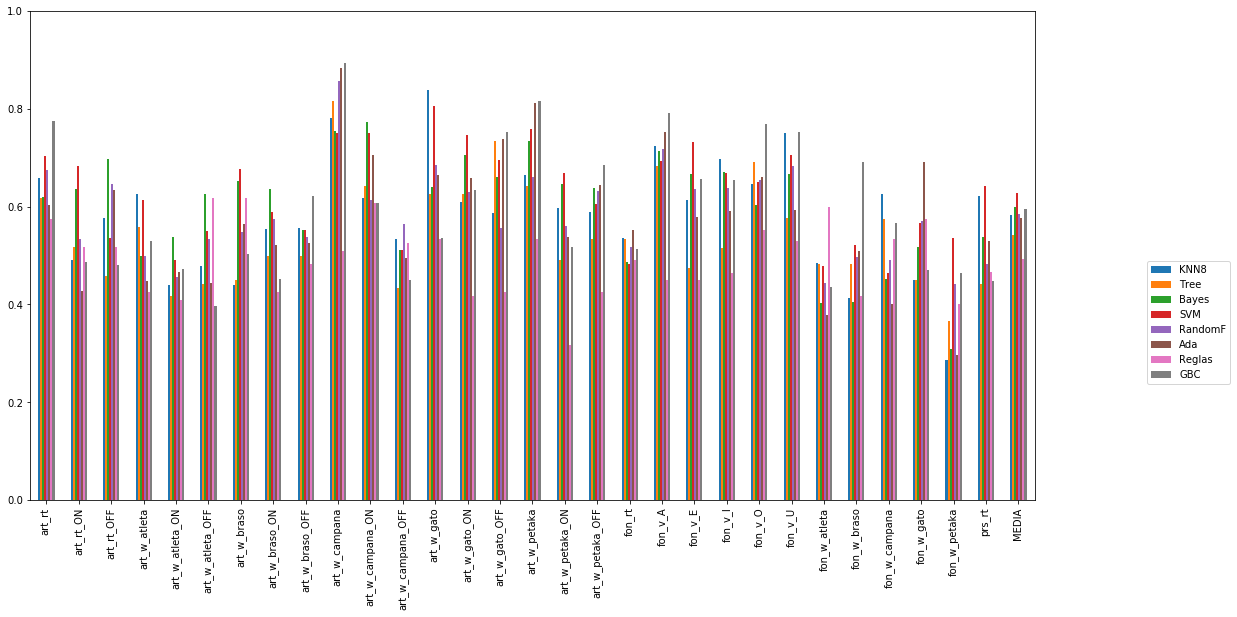

In [14]:
ex.process_results(all_results, data_names, model_names, 'bar')

## 1.2 Grid Search Orozco <a id="gssvm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Explicada las funciones, parámetros devueltos y funcionamiento del experimento en notebooks anteriores y documentación de la calse. Experimento artículo 2016 Orozco: SVM con kernel gaussiano haciendo gridSearch de parámetros C y  𝛾  realizando 10-fold cross-validation. SCORING:AUC.  **Mejores resultados normalizando**.

No se mejora el experimento de Orozco respecto a anteriores resultados obtenidos por nosotros. Mejor en este caso: **(fon_w_gato	0.725)**

In [15]:
def best_to_panda(mej):
    return pd.DataFrame.from_dict(mej, orient='index',columns=['SCORE']).sort_values(by=['SCORE'], ascending=False)

In [16]:
ex = Experimenter()
param_grid = [
      {'C': [1,10,20,50,100,200,500,1000,2000,5000,10000], 'kernel': ['rbf'], 'gamma' : [1,10,20,50,100,200,500,1000]},
 ]

bestsOrz = ex.GridSearchPipe(cargaDatosMujeres,svm.SVC(),param_grid, verbose=False, normalizar=True)
best_to_panda(bestsOrz)

,SCORE
fon_w_gato,0.725000
fon_v_A,0.714732
fon_v_U,0.712436
art_w_campana_ofset,0.688889
art_w_gato_ofset,0.677778
art_w_petaka_ofset,0.677778
art_w_atleta_onset,0.638889
art_rt_ofset,0.633333
art_w_atleta_ofset,0.630556
fon_v_E,0.626786


##### Tanta diferencia entre splits?: importancia de la validación, manera de estratificar.

## 1.3 Variance Treshold <a id="vtres"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
SCORING = AUC. AdaBoost y GBC **(0.883 art_campana-AdaBoost)** igual que antes con params por defecto y atributos normalizados. 4 por encima del 0.8.

In [18]:
modulo = cargaDatosMujeres

In [19]:
def seleccion_atribs_pipe(modulo, selector, clsf):
    res=[]
    for dtst in [ d for d in dir(modulo) if d.startswith('load')]:
        datos = getattr(modulo, dtst)()
        X = datos.data
        y = datos.target
        sc = MinMaxScaler()
        X = sc.fit(X).transform(X) if clsf != 'AdaBoostClassifier' else X #Comentar para no normalizar
        params = 'chi2, k=19' if selector == 'SelectKBest' else ''
        params = 'threshold=(0.1)' if selector == 'VarianceThreshold' and clsf == 'AdaBoostClassifier' else ''
        estimators = [('feat_sel', eval(selector+'('+params+')')), ('clf', eval(clsf+'()'))]
        pipe = Pipeline(estimators)
        sc=cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean()
        res.append(sc)
    return res

In [20]:
df_VT = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'RandomForestClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'VarianceThreshold',clf)
    df_VT[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_VT

,AdaBoos,Gradien,svm.SVC,RandomF
art_rt,0.500000,0.775000,0.702778,0.641667
art_rt_ofset,0.688889,0.444444,0.536111,0.426389
art_rt_onset,0.483333,0.486111,0.683333,0.562500
art_w_atleta,0.458333,0.505556,0.613889,0.498611
art_w_atleta_ofset,0.444444,0.397222,0.550000,0.593056
art_w_atleta_onset,0.444444,0.422222,0.491667,0.530556
art_w_braso,0.491667,0.522222,0.677778,0.494444
art_w_braso_ofset,0.525000,0.658333,0.552778,0.420833
art_w_braso_onset,0.497222,0.438889,0.588889,0.673611
art_w_campana,0.883333,0.847222,0.750000,0.791667


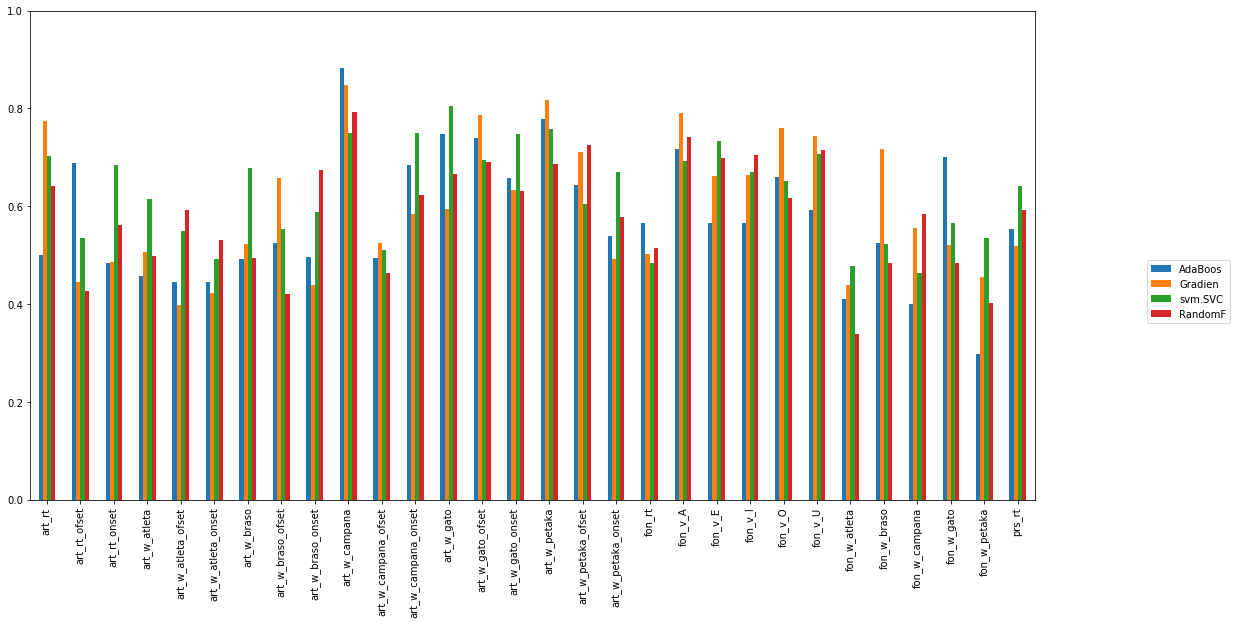

In [21]:
df_VT.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

## 1.4 SKBEST <a id="skbest"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejores resultados art_campana, art_ rt y art_gato_onset. 2 por encima de 0.8. **(0.816 GBC-art_w_gato_on)**

In [22]:
df_SK = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'RandomForestClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'SelectKBest',clf)
    df_SK[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_SK

,AdaBoos,Gradien,svm.SVC,RandomF
art_rt,0.677778,0.797222,0.758333,0.666667
art_rt_ofset,0.504167,0.566667,0.580556,0.609722
art_rt_onset,0.511111,0.594444,0.658333,0.559722
art_w_atleta,0.477778,0.408333,0.544444,0.383333
art_w_atleta_ofset,0.433333,0.461111,0.572222,0.481944
art_w_atleta_onset,0.547222,0.702778,0.600000,0.533333
art_w_braso,0.366667,0.475000,0.547222,0.458333
art_w_braso_ofset,0.658333,0.702778,0.611111,0.566667
art_w_braso_onset,0.602778,0.641667,0.586111,0.579167
art_w_campana,0.783333,0.772222,0.755556,0.762500


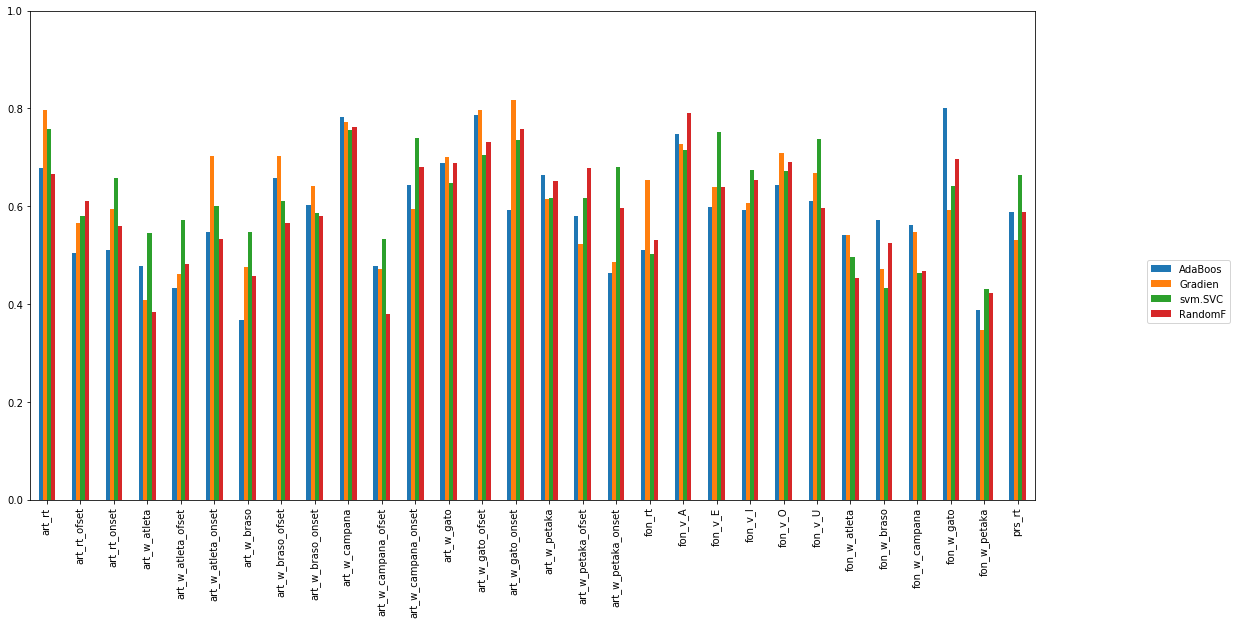

In [23]:
df_SK.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

## 1.5 Grid Search - Variance Treshold + AdaBoost <a id="vtab"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
**Mejor resultado Normalizando**. SE BATE NUESTRO MEJOR RESULTADO Tonica habitual: mejores los art (transiciones), todos suben por lo general, algunos por encima del 0.8. 
* **SE CONSIGUE EL MEJOR RESULTADO OBTENIDO HASTA AHORA CON UN 0.9 PARA NORM(ART_RT)-ADABOOST-VT(0.05).**

##### Sin Normalizar 
1 por encima de 0.8: art_campana. **(art_w_campana	0.87)** De la magnitud de los resultados mejores: 0.884 es el mejor para Adaboost en anteriores experimentos. Tonica habitual: mejores los art (transiciones), todos suben por lo general, algunos por encima del 0.8 pero se estancan sin conseguir batir el mejor resultado.

In [24]:
ex = Experimenter()
param_grid = dict(select__threshold=[0.05, 0.08, 0.16, 0.2, 0.4 ])
pip = Pipeline([('select', VarianceThreshold()), ('clf', AdaBoostClassifier())])

bestsGsVtAda = ex.GridSearchPipe(cargaDatosMujeres, pip, param_grid, verbose=False, normalizar=False)

In [25]:
best_to_panda(bestsGsVtAda)

,SCORE
art_w_campana,0.872222
art_w_petaka,0.786111
art_w_gato,0.738889
art_w_gato_ofset,0.736111
fon_v_A,0.715370
fon_w_gato,0.700000
art_w_campana_onset,0.683333
art_w_petaka_ofset,0.666667
fon_v_O,0.663106
art_w_gato_onset,0.658333


##### Normalizando
**SE BATE NUESTRO MEJOR RESULTADO** Tonica habitual: mejores los art (transiciones), todos suben por lo general, algunos por encima del 0.8. **SE CONSIGUE EL MEJOR RESULTADO OBTENIDO HASTA AHORA CON UN 0.9 PARA NORM(ART_RT)-ADABOOST-VT(0.05)**. También resultados 'altos' para art_campana (0.88).

In [29]:
param_grid = dict(select__threshold=[0.01, 0.02, 0.03, 0.04])
ex = Experimenter()
bestsGsVtAdaN = ex.GridSearchPipe(cargaDatosMujeres, pip, param_grid,verbose=False, normalizar=True)
best_to_panda(bestsGsVtAdaN)

,SCORE
art_w_campana,0.883333
art_w_petaka,0.752778
fon_v_O,0.718112
art_w_campana_onset,0.713889
art_w_gato_onset,0.708333
art_w_gato_ofset,0.700000
fon_v_A,0.676658
fon_w_gato,0.658333
art_rt_ofset,0.655556
art_w_braso,0.652778


**Mejor experimento** (_No se ha realizado con los de arriba, ya que en algunos datasets para la varianza 0.05 daba error_)

In [41]:
X = cargaDatosMujeres.load_art_rt().data
y = cargaDatosMujeres.load_art_rt().target
sc = MinMaxScaler()
X = sc.fit(X).transform(X)
pip = Pipeline([('select', VarianceThreshold(0.05)), ('clf', AdaBoostClassifier())])
cross_val_score(pip,X,y,cv=10,scoring='roc_auc').mean()

0.9055555555555556

-----------------------
## 1.6 Grid Search - Seleckt KBest + RF <a id="skrf"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Tónica del experimento: de los mejores  son  conjuntos de datos de articulación y van **de 0.7 a 0.8 aprox**.

In [36]:
ex = Experimenter()
param_grid = dict(select__k=[10,15,22], clf__min_samples_leaf=[1,3,5,10], clf__max_depth=[5, None], clf__n_estimators=[10, 25, 40])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', RandomForestClassifier())])
bestsGsSkRfN = ex.GridSearchPipe(cargaDatosMujeres, pip, param_grid,verbose=False, normalizar=True)
best_to_panda(bestsGsSkRfN)

,SCORE
fon_v_A,0.820217
art_w_campana,0.800000
art_rt,0.755556
art_w_gato_onset,0.740278
art_w_braso_ofset,0.727778
fon_v_O,0.695041
art_w_braso_onset,0.694444
art_w_campana_onset,0.694444
fon_v_U,0.690338
art_w_petaka_onset,0.679167


## 1.7 Grid Search - Seleckt KBest + AdaBoost <a id="skada"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
**SE BATE NUESTRO MEJOR RESULTADO** Tonica habitual: mejores los art (transiciones), todos suben por lo general, algunos por encima del 0.8. **SE CONSIGUE EL MEJOR RESULTADO OBTENIDO HASTA AHORA CON UN 0.9 PARA NORM(ART_campana)-ADABOOST-SKBEST**. También resultados 'altos' para art_rt (0.86).

In [37]:
ex = Experimenter()
param_grid = dict(select__k=[10,15,22])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', AdaBoostClassifier())])
bestsGsSkADAN = ex.GridSearchPipe(cargaDatosMujeres, pip, param_grid,verbose=False, normalizar=True)

In [38]:
best_to_panda(bestsGsSkADAN).head()

,SCORE
art_w_campana,0.908333
art_rt,0.869444
fon_w_gato,0.800000
fon_v_U,0.746747
art_w_gato_ofset,0.722222


## 1.8 Grid Search - Seleckt KBest + GBC<a id="skgbc"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [39]:
ex = Experimenter()
param_grid = dict(select__k=[10,15,22])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', GradientBoostingClassifier())])
bestsGsSkGBCN = ex.GridSearchPipe(cargaDatosMujeres, pip, param_grid,verbose=False, normalizar=True)

In [40]:
best_to_panda(bestsGsSkGBCN).head()

,SCORE
art_w_campana,0.880556
art_w_gato_onset,0.827778
art_w_gato_ofset,0.819444
art_rt,0.794444
fon_v_A,0.770599
